# Explore data from social media sites



In [ ]:
!python -m pip install pandas matplotlib snscrape

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import time

import snscrape

pd.set_option('display.max_rows', 250)

from collections import defaultdict

print('Pandas version ======> ' , pd.__version__)
print('Seaborn version ======> ' , sns.__version__)
print('Json version ========> ' , json.__version__)
print('Numpy version =======> ' , np.__version__)

Pandas version ======>  1.5.3
Seaborn version ======>  0.12.2
Json version ========>  2.0.9
Numpy version =======>  1.24.2


In [5]:
!python3 --version

Python 3.8.10


## Begin loading the json into a dataframe

This notebook is using the output from another Python application that scraped data from Twitter.


The data file was generated using [snscrape](https://github.com/bellingcat/snscrape) with the following parametes:

>$snscrape --jsonl --max-results 100 twitter-user textfiles >twit_test01.json


The data file contains 233 columns after normalizing, and I just want to first explore raw content that the user generated.  Additionally I want to also set the data type instead of relying on Python to do this automatically. 

In [6]:
path = '../data/raw/twit_test01.json'

In [ ]:
open(path).readline()

In [ ]:
!cat twit_test01.json

In [8]:
records = [json.loads(line) for line in open(path)]

In [ ]:
records[0]

In [9]:
#import time
start_time = time.perf_counter()
df_tw1= pd.json_normalize(records)   #first test of twitter data 
end_time = time.perf_counter()

print(f'Dataframe took {end_time - start_time} seconds to load')

Dataframe took 0.03002855507656932 seconds to load


In [10]:
df_tw1.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/textfiles/status/163525389...   
1  https://twitter.com/textfiles/status/163457551...   
2  https://twitter.com/textfiles/status/163429326...   
3  https://twitter.com/textfiles/status/163429277...   
4  https://twitter.com/textfiles/status/163427786...   

                        date  \
0  2023-03-13T12:18:04+00:00   
1  2023-03-11T15:22:25+00:00   
2  2023-03-10T20:40:53+00:00   
3  2023-03-10T20:38:56+00:00   
4  2023-03-10T19:39:41+00:00   

                                          rawContent  \
0  @ryan_wiancko Bob was a great interview!\n\nht...   
1  @OldTechAdverts In the world of OldTechAdverts...   
2  I won't call out the names of the cool compani...   
3  OK, the Computer Shoppers will be on their way...   
4                            https://t.co/Pa7CA8YWvI   

                                     renderedContent                   id  \
0  @ryan_wiancko Bob was a great interview!\n\nar...  1635253895378378753   
1  @OldTechAdverts In the world of OldTechAdverts...  1634575511278985217   
2  I won't call out the names of the cool compani...  1634293267830386688   
3  OK, the Computer Shoppers will be on their way...  1634292776106962947   
4                   en.wikipedia.org/wiki/United_St…  1634277868443258898   

   replyCount  retweetCount  likeCount  quoteCount  ...  \
0           0             0          1           0  ...   
1           0             0          5           0  ...   
2           1             0         27           0  ...   
3           6            10        170           2  ...   
4           0             2         11           0  ...   

   quotedTweet.inReplyToUser.linkTcourl quotedTweet.inReplyToUser.linkUrl  \
0                                   NaN                               NaN   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN                               NaN   
4                                   NaN                               NaN   

  quotedTweet.inReplyToUser.url quotedTweet.card._type quotedTweet.card.title  \
0                           NaN                    NaN                    NaN   
1                           NaN                    NaN                    NaN   
2                           NaN                    NaN                    NaN   
3                           NaN                    NaN                    NaN   
4                           NaN                    NaN                    NaN   

  quotedTweet.card.url quotedTweet.card.description  \
0                  NaN                          NaN   
1                  NaN                          NaN   
2                  NaN                          NaN   
3                  NaN                          NaN   
4                  NaN                          NaN   

  quotedTweet.card.thumbnailUrl  quotedTweet.card.siteUser  \
0                           NaN                        NaN   
1                           NaN                        NaN   
2                           NaN                        NaN   
3                           NaN                        NaN   
4                           NaN                        NaN   

   quotedTweet.card.creatorUser  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  

[5 rows x 233 columns]

In [38]:
#should return 100 rows
len(df_tw1)

100

In [ ]:
df_tw1.dtypes

In [13]:
df_tw1.dtypes.value_counts()

object     144
float64     73
int64       14
bool         2
dtype: int64

## Save the dataframe to csv

In [26]:
df_tw1.to_csv('../data/raw/tweet_dump1.csv')

In [27]:
from numpy import float64, int64

tweet_dtypes = {'url': str,
'date': object,
'rawContent': str,
'renderedContent': str,
'id': int64,
'user': str,
'replyCount': int,
'retweetCount': int,
'likeCount': int,
'quoteCount': int,
'conversationId': int,
'lang': str,
'source': str,
'sourceUrl': str,
'sourceLabel': str,
'links': str,
'media': str,
'retweetedTweet': str,
'quotedTweet': str,
'inReplyToTweetId': str,
'inReplyToUser': str,
'mentionedUsers': str,
'coordinates': float64,
'place': str,
'hashtags': str,
'cashtags': str,
'card': str,
'username': str,
'outlinks': str,
'outlinksss': str,
'tcooutlinks': str,
'tcooutlinksss': str,
'content': str}                

In [28]:
usecols1 = ['url', 
'date', 
'rawContent', 
'renderedContent', 
'id', 
'username', 
'replyCount', 
'retweetCount', 
'likeCount', 
'quoteCount', 
'conversationId', 
'lang']

In [30]:
start_time = time.perf_counter()
df_tw2= pd.read_csv('../data/raw/tweet_dump1.csv', parse_dates=['date'])    
end_time = time.perf_counter()

print(f'Dataframe took {end_time - start_time} seconds to load')

Dataframe took 0.024450738914310932 seconds to load


In [31]:
start_time = time.perf_counter()
df_tw3= pd.read_csv('../data/raw/tweet_dump1.csv', dtype=tweet_dtypes,
                   usecols=usecols1, 
                   parse_dates=['date'],
                   index_col='id') 
end_time = time.perf_counter()

print(f'Dataframe took {end_time - start_time} seconds to load')

Dataframe took 0.010352005250751972 seconds to load


In [32]:
df_tw3.dtypes

url                             object
date               datetime64[ns, UTC]
rawContent                      object
renderedContent                 object
replyCount                       int64
retweetCount                     int64
likeCount                        int64
quoteCount                       int64
conversationId                   int64
lang                            object
username                        object
dtype: object

In [33]:
df_tw3['likeCount'].describe()

count    100.000000
mean      34.960000
std       75.551163
min        0.000000
25%        2.000000
50%       12.000000
75%       39.500000
max      531.000000
Name: likeCount, dtype: float64

In [34]:
df_tw3['retweetCount'].describe()

count    100.000000
mean       4.660000
std       20.547172
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      175.000000
Name: retweetCount, dtype: float64

In [35]:
df_tw3.shape

(100, 11)

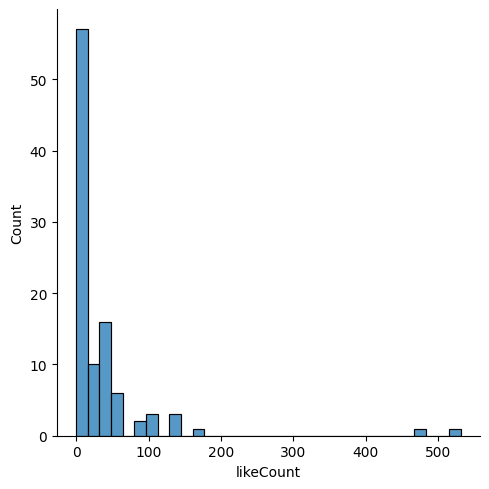

In [36]:
#Check out the distribution of values
sns.displot(df_tw3['likeCount'], kde=False);

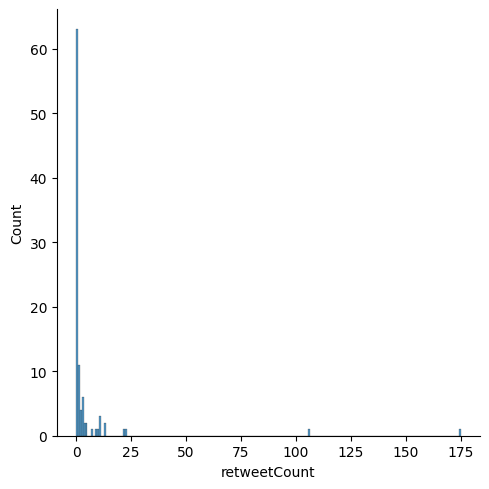

In [37]:
sns.displot(df_tw3['retweetCount'], kde=False);

In [ ]:
#WIP

## WIP Parse the Json with the Python standard library

In [ ]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [ ]:
def top_retweet_counts(count_dict, n=10):
    value_key_pairs = [(count, retweetCount) for retweetCount, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [ ]:
retweets = [rec['retweetCount'] for rec in records if 'retweetCount' in rec]

In [ ]:
rt_counts = get_counts(retweets)
top_retweet_counts(retweets)

In [ ]:
user_names = [rec['username'] for rec in records if 'username' in rec]

In [ ]:
likes = [rec['likeCount'] for rec in records if 'likeCount' in rec]

In [ ]:
mentioned_others = [rec['mentionedUsers'] for rec in records if 'mentionedUsers' in rec]

In [ ]:
mentioned_others[:10]

In [ ]:
mentioned_counts = get_counts(mentioned_others)

In [ ]:
user_names[:100]

In [ ]:
counts = get_counts(user_names)

In [ ]:
counts['textfiles']

In [ ]:
len(user_names)

In [ ]:
top_retweet_counts(retweets)

In [ ]:
like_counts = get_counts(likes)

In [ ]:
counts['likes']